### <center>COMP20008 - 2018 - SM2 - Project Phase 3</center>
# <center>Staying In Cities Affects Teenagers' Emotional and Sexual Health</center>
<span style="color:red">The goal for this investigation is to see if there is a significant relationship between a teenager's emotional and sexual health and the type of region they stay in. </span> 

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Digraph
from IPython.display import Image


### Helper Functions

In [2]:
def VAT(R):
          
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I


def my_entropy(probs):
    return -probs.dot(np.log2(probs))


def mutual_info(X,Y):
    
    df = pd.DataFrame.from_dict({'X' : X,  'Y' :Y})
    Hx = my_entropy(df.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = my_entropy(df.iloc[:,1].value_counts(normalize=True, sort=False))
    
    
    counts = df.groupby(["X","Y"]).size()
    probs = counts/ counts.values.sum()
    H_xy = my_entropy(probs)

    
    # Mutual Information
    
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy)  
    return NMI


### Loading the datasets

In [3]:
emotional = pd.read_csv("VCAMS_-_10.1_-_Proportion_of_children_with_emotional_or_behaviour_difficulties__LGA__2010_-_2013.csv", skipinitialspace=True, index_col = 'lga_name')
concerning = pd.read_csv("VCAMS_-_10.2_-_Proportion_of_children_with_concerning_behaviour__LGA__2009_-_2013.csv", skipinitialspace=True, index_col = 'lga_name')
fertility = pd.read_csv("VCAMS_-_14.1_-_Teenage_fertility_rate__LGA__2007_-_2012.csv", skipinitialspace=True, index_col = 'lga_name')
sti = pd.read_csv("VCAMS_-_14.9_-_Rate_of_STI_in_young_people__LGA__2007_-_2012.csv", skipinitialspace=True, index_col = 'lga_name')
stress = pd.read_csv("VCAMS_-_24.2_-_Children_with_high_levels_of_family_stress__LGA__2009_-_2013.csv", skipinitialspace=True, index_col = 'lga_name')


In [4]:
city = []
rural = []
for row in fertility.index:
    if "(C)" in row:
        city.append(row)
    else:
        rural.append(row)
        
cities = fertility.loc[city,:]
rurals = fertility.loc[rural,:]

print(cities['denominators_2010'].sum())
print(cities['denominators_2011'].sum())
print(cities['denominators_2012'].sum())
print((cities['denominators_2010'].sum()+cities['denominators_2011'].sum()+cities['denominators_2012'].sum())/3)

print(rurals['denominators_2010'].sum())
print(rurals['denominators_2011'].sum())
print(rurals['denominators_2012'].sum())
print((rurals['denominators_2010'].sum()+rurals['denominators_2011'].sum()+rurals['denominators_2012'].sum())/3)

first = (cities['denominators_2010'].sum()/(cities['denominators_2010'].sum()+rurals['denominators_2010'].sum()))
second = (cities['denominators_2011'].sum()/(cities['denominators_2011'].sum()+rurals['denominators_2011'].sum()))
third = (cities['denominators_2012'].sum()/(cities['denominators_2012'].sum()+rurals['denominators_2012'].sum()))

print(first, second, third, (first+second+third)/3)


cities = sti.loc[city,:]
rurals = sti.loc[rural,:]

print(cities['denominators_2010'].sum())
print(cities['denominators_2011'].sum())
print(cities['denominators_2012'].sum())
print((cities['denominators_2010'].sum()+cities['denominators_2011'].sum()+cities['denominators_2012'].sum())/3)

print(rurals['denominators_2010'].sum())
print(rurals['denominators_2011'].sum())
print(rurals['denominators_2012'].sum())
print((rurals['denominators_2010'].sum()+rurals['denominators_2011'].sum()+rurals['denominators_2012'].sum())/3)

first = (cities['denominators_2010'].sum()/(cities['denominators_2010'].sum()+rurals['denominators_2010'].sum()))
second = (cities['denominators_2011'].sum()/(cities['denominators_2011'].sum()+rurals['denominators_2011'].sum()))
third = (cities['denominators_2012'].sum()/(cities['denominators_2012'].sum()+rurals['denominators_2012'].sum()))

print(first, second, third, (first+second+third)/3)



126104.0
127210.0
127143.0
126819.0
47576.0
45185.0
45364.0
46041.666666666664
0.7260709350529709 0.7378984309289712 0.7370309610624496 0.7336667756814639
291157.0
290377.0
290511.0
290681.6666666667
116631.0
116915.0
116728.0
116758.0
0.7139910934112823 0.7129455034717107 0.713367334660973 0.7134346438479886


# <center>Data Wrangling/Cleaning</center>

### Cleaning Dataset and Analysis for Proportion of Children with Emotional or Behaviour Difficulties

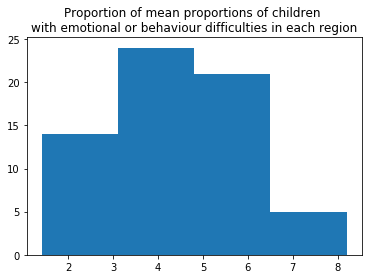

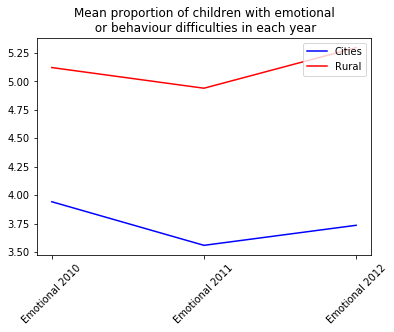

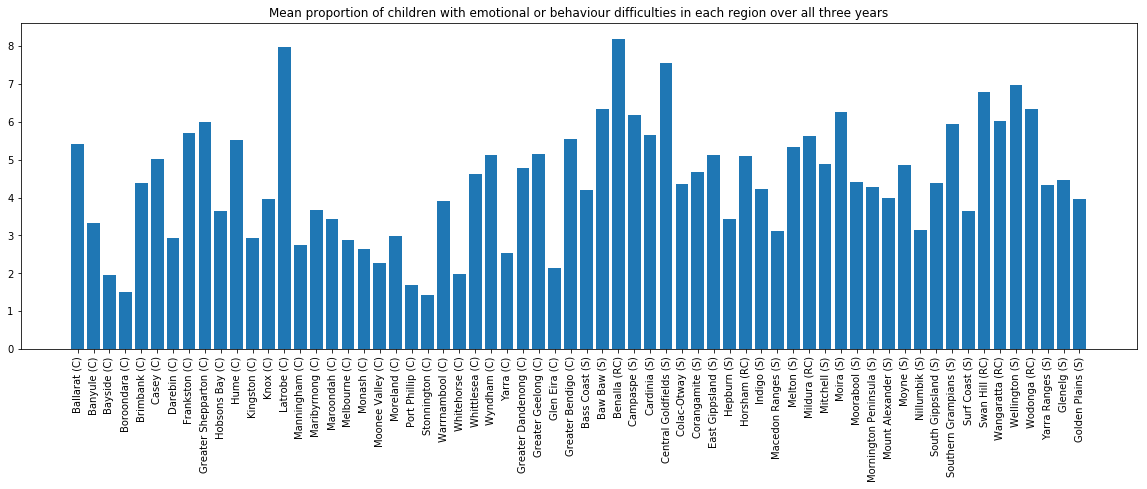

Text(0.5,1,'Pearson Correlation of proportion means from year to year')

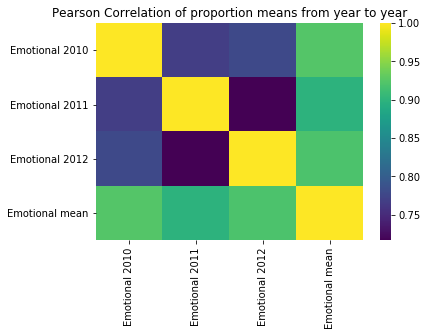

In [5]:
# From all the columns, we only want the columns holding the proportions (those with the word 'indicator') and those in 2010-2012 (because these are the only years that overlap)


# If we do not take only those from 2010-2012, we would not be able to compare all the datasets

cols = []
for col in emotional.columns:
    if "indicator" in col and (("2010" in col) or ("2011" in col) or ("2012" in col)):
        cols.append(col)
cols.sort()


# Rename the columns and get rid of rows with null values so they do not create errors

columns = ['Emotional 2010', 'Emotional 2011', 'Emotional 2012'] 
emotional = emotional.loc[:,cols]
emotional.columns = columns
emotional = emotional.dropna() 


# Split them between cities and rural areas so cities would come before rural areas in graphs

city = []
rural = []
for row in emotional.index:
    if "(C)" in row:
        city.append(row)
    else:
        rural.append(row)
        
cities = emotional.loc[city,:]
rurals = emotional.loc[rural,:]


# Get the means of the proportion of all the cities and all the rural areas respectively (column-wise) over all three years

cities.loc['Emotional mean'] = cities.mean() 
rurals.loc['Emotional mean'] = rurals.mean()


# Append all the rural areas to the cities (now all the cities would be graphed first before the rural areas)

emotional = emotional.loc[city,:].append(emotional.loc[rural,:])


# Get the mean proportion of each of the regions

emotional['Emotional mean'] = emotional[emotional.columns].mean(axis=1)
emotional = emotional.dropna()


# Plot histogram of the mean proportion of the whole of Victoria with 4 bins

plt.hist(emotional['Emotional mean'], bins = 4)
plt.title('Proportion of mean proportions of children \nwith emotional or behaviour difficulties in each region')
plt.show()


# Plot two line graphs showing the mean proportions when split between cities and rural areas

plt.xticks(range(7),list(columns),rotation = 45)
plt.title('Mean proportion of children with emotional\n or behaviour difficulties in each year')
plt.plot(cities.loc['Emotional mean',:], color = 'b', label = 'Cities')

plt.xticks(range(7),list(columns),rotation = 45)
plt.plot(rurals.loc['Emotional mean',:], color = 'r', label = 'Rural')
plt.legend(loc='upper right')
plt.show()


# Plot into a bar graph

plt.figure(figsize = (20, 6))
plt.bar(np.arange(len(emotional['Emotional mean'])),emotional['Emotional mean'])
plt.title('Mean proportion of children with emotional or behaviour difficulties in each region over all three years')
plt.xticks(np.arange(len(emotional.index)),emotional.index, rotation=90)
plt.show()


# Correlation of the proportions from year to year

cor = sns.heatmap(emotional.corr(), cmap = 'viridis', xticklabels = list(emotional), yticklabels = list(emotional))
plt.title('Pearson Correlation of proportion means from year to year')


### Cleaning Dataset and Analysis for Proportion of Children with Concerning Behaviour

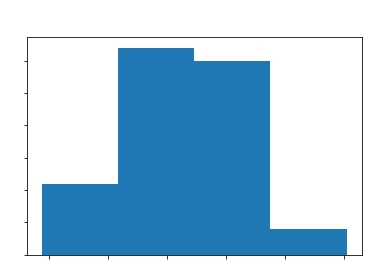

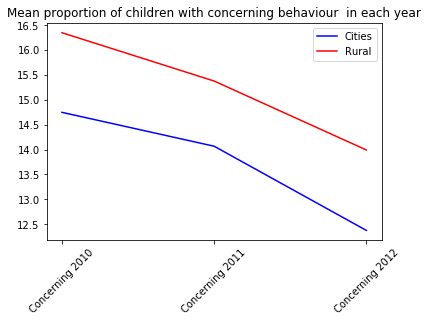

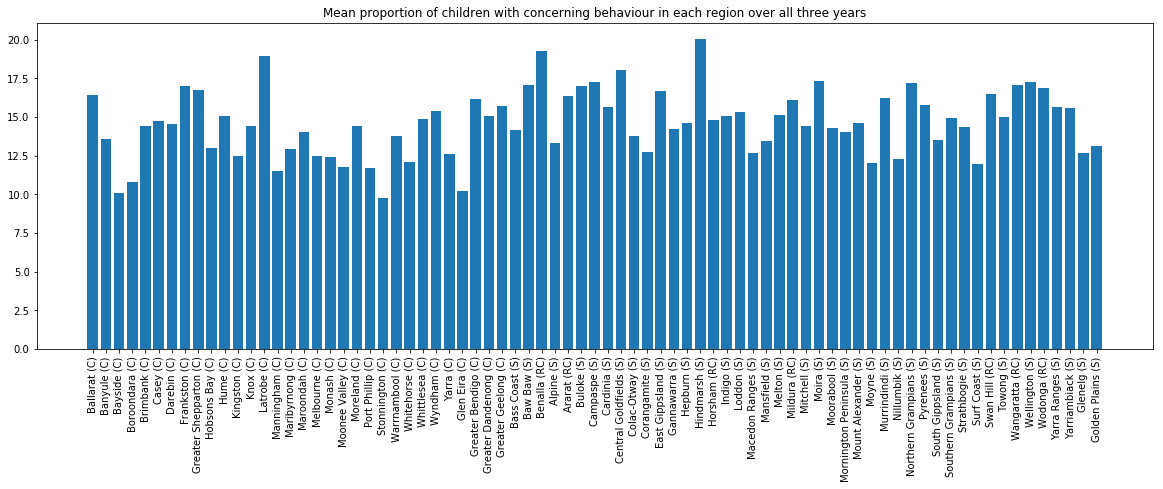

Text(0.5,1,'Pearson Correlation of proportion means from year to year')

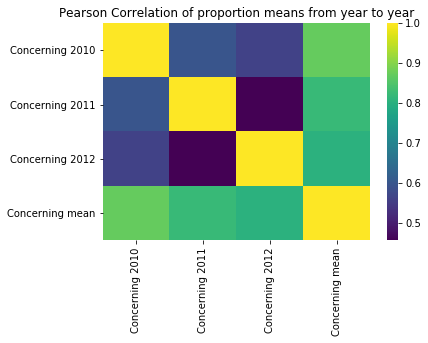

In [6]:
# Do the same as above

cols = []
for col in concerning.columns:
    if "indicator" in col and (("2010" in col) or ("2011" in col) or ("2012" in col)):
        cols.append(col)
cols.sort()

columns = ['Concerning 2010', 'Concerning 2011', 'Concerning 2012']
concerning = concerning.loc[:,cols]
concerning.columns = columns
concerning = concerning.dropna()

city = []
rural = []
for row in concerning.index:
    if "(C)" in row:
        city.append(row)
    else:
        rural.append(row)

cities = concerning.loc[city,:]
rurals = concerning.loc[rural,:]

cities.loc['Concerning mean'] = cities.mean()
rurals.loc['Concerning mean'] = rurals.mean()

concerning = concerning.loc[city,:].append(concerning.loc[rural,:])

concerning['Concerning mean'] = concerning[concerning.columns].mean(axis=1)
concerning = concerning.dropna()

plt.hist(concerning['Concerning mean'], bins = 4)
plt.title('Proportion of mean proportions of children \nwith concerning behaviour in each region', color='w')
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.savefig('Concerning.pdf', transparent = True)
plt.show()

plt.xticks(range(7),list(columns),rotation = 45)
plt.title('Mean proportion of children with concerning behaviour  in each year')
plt.plot(cities.loc['Concerning mean',:], color = 'b', label = 'Cities')

plt.xticks(range(7),list(columns),rotation = 45)
plt.plot(rurals.loc['Concerning mean',:], color = 'r', label = 'Rural')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize = (20, 6))
plt.bar(np.arange(len(concerning['Concerning mean'])),concerning['Concerning mean'])
plt.title('Mean proportion of children with concerning behaviour in each region over all three years')
plt.xticks(np.arange(len(concerning.index)),concerning.index, rotation=90)
plt.show()

cor = sns.heatmap(concerning.corr(), cmap = 'viridis', xticklabels = list(concerning), yticklabels = list(concerning))
plt.title('Pearson Correlation of proportion means from year to year')


### Cleaning Dataset and Analysis for Teenage Fertility Rate

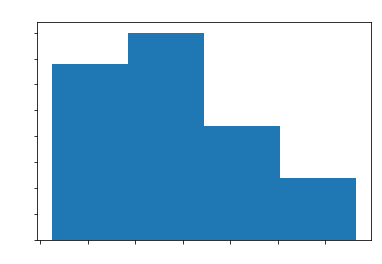

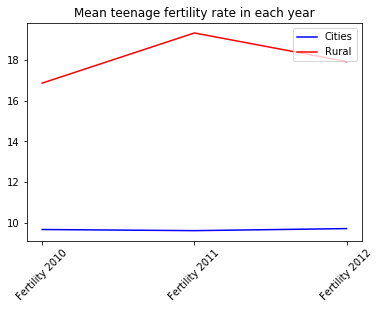

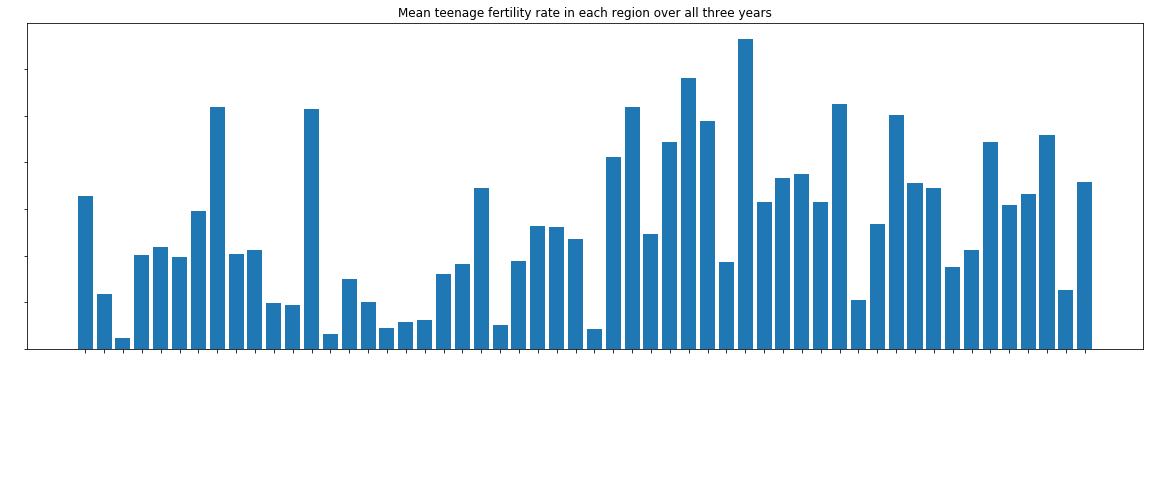

Text(0.5,1,'Pearson Correlation of rates from year to year')

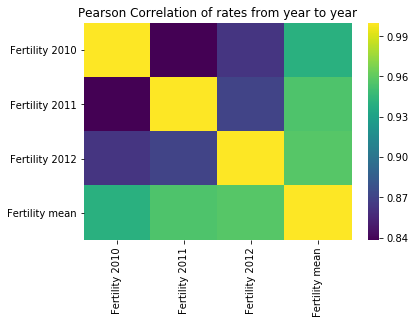

In [7]:
# Do the same as above

cols = []
for col in fertility.columns:
    if ("indicator" in col) and (("2010" in col) or ("2011" in col) or ("2012" in col)):
        cols.append(col)
cols.sort()

columns = ['Fertility 2010', 'Fertility 2011', 'Fertility 2012']
fertility = fertility.loc[:,cols]
fertility.columns = columns
fertility = fertility.dropna()

city = []
rural = []
for row in fertility.index:
    if "(C)" in row:
        city.append(row)
    else:
        rural.append(row)

cities = fertility.loc[city,:]
rurals = fertility.loc[rural,:]
cities.loc['Fertility mean'] = cities.mean()
rurals.loc['Fertility mean'] = rurals.mean()

fertility = fertility.loc[city,:].append(fertility.loc[rural,:])

fertility['Fertility mean'] = fertility[fertility.columns].mean(axis=1)
fertility = fertility.dropna()

plt.hist(fertility['Fertility mean'], bins = 4)
plt.title('Proportion of mean teenage fertility rates in each region', color = 'w')
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.savefig('Fertility.pdf', transparent = True)
plt.show()

plt.xticks(range(7),list(columns),rotation = 45)
plt.title('Mean teenage fertility rate in each year')
plt.plot(cities.loc['Fertility mean',:], color = 'b', label = 'Cities')

plt.xticks(range(7),list(columns),rotation = 45)
plt.plot(rurals.loc['Fertility mean',:], color = 'r', label = 'Rural')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize = (20, 6))
plt.bar(np.arange(len(fertility['Fertility mean'])),fertility['Fertility mean'])
plt.title('Mean teenage fertility rate in each region over all three years')
plt.xticks(np.arange(len(fertility.index)),fertility.index, rotation=90, color = 'w')
plt.yticks(color = 'w')
plt.show()

cor = sns.heatmap(fertility.corr(), cmap = 'viridis', xticklabels = list(fertility), yticklabels = list(fertility))
plt.title('Pearson Correlation of rates from year to year')


### Cleaning Dataset and Analysis for Rate of STI in Young People

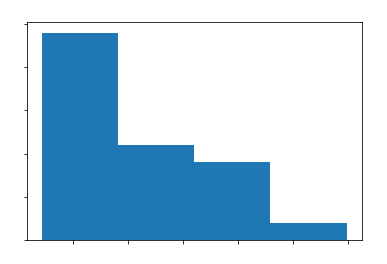

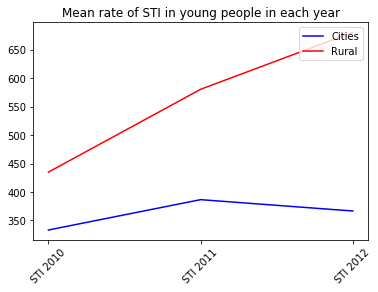

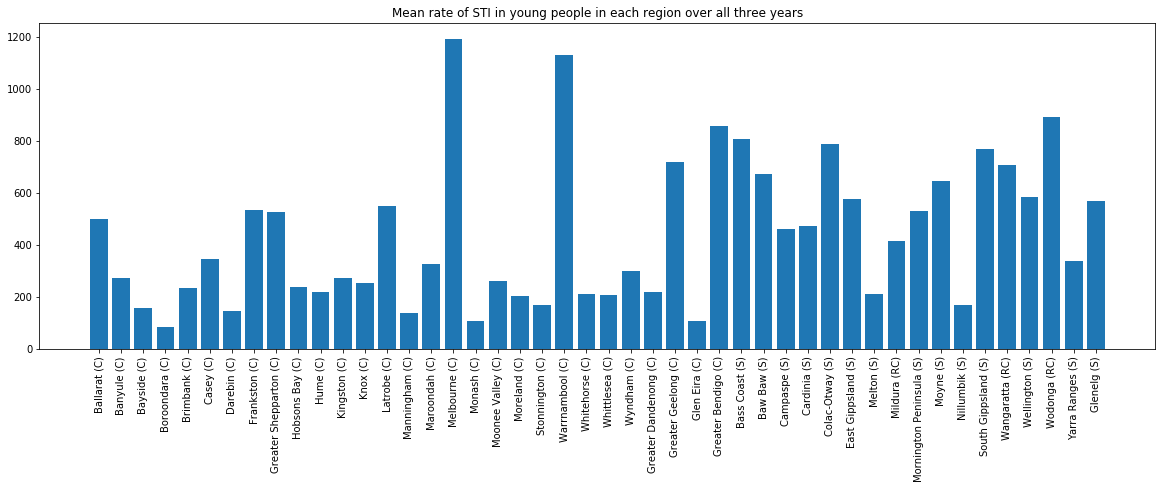

Text(0.5,1,'Pearson Correlation of rates from year to year')

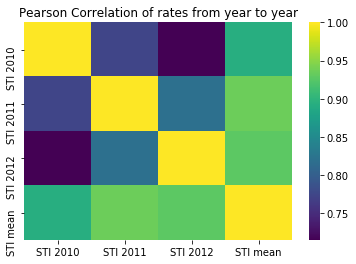

In [8]:
# Do the same as above

cols = []
for col in sti.columns:
    if "indicator" in col and (("2010" in col) or ("2011" in col) or ("2012" in col)):
        cols.append(col)
cols.sort()

columns = ['STI 2010', 'STI 2011', 'STI 2012']
sti = sti.loc[:,cols]
sti.columns = columns
sti = sti.dropna()

city = []
rural = []
for row in sti.index:
    if "(C)" in row:
        city.append(row)
    else:
        rural.append(row)
        
cities = sti.loc[city,:]
rurals = sti.loc[rural,:]
cities.loc['STI mean'] = cities.mean()
rurals.loc['STI mean'] = rurals.mean()

sti = sti.loc[city,:].append(sti.loc[rural,:])

sti['STI mean'] = sti[sti.columns].mean(axis=1)
sti = sti.dropna()

plt.hist(sti['STI mean'], bins = 4)
plt.title('Proportion of mean rate of STI in young people in each region',color = 'w')
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.savefig('STI.pdf', transparent = True)
plt.show()

plt.xticks(range(7),list(columns),rotation = 45)
plt.title('Mean rate of STI in young people in each year')
plt.plot(cities.loc['STI mean',:], color = 'b', label = 'Cities')

plt.xticks(range(7),list(columns),rotation = 45)
plt.plot(rurals.loc['STI mean',:], color = 'r', label = 'Rural')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize = (20, 6))
plt.bar(np.arange(len(sti['STI mean'])),sti['STI mean'])
plt.title('Mean rate of STI in young people in each region over all three years')
plt.xticks(np.arange(len(sti.index)),sti.index, rotation=90)
plt.show()

cor = sns.heatmap(sti.corr(), cmap = 'viridis', xticklabels = list(sti), yticklabels = list(sti))
plt.title('Pearson Correlation of rates from year to year')


### Cleaning Dataset and Analysis for Proportion of Children with High Levels of Family Stress

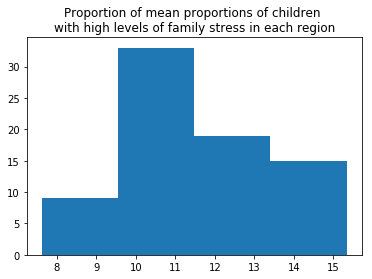

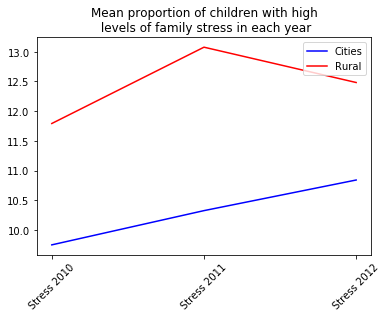

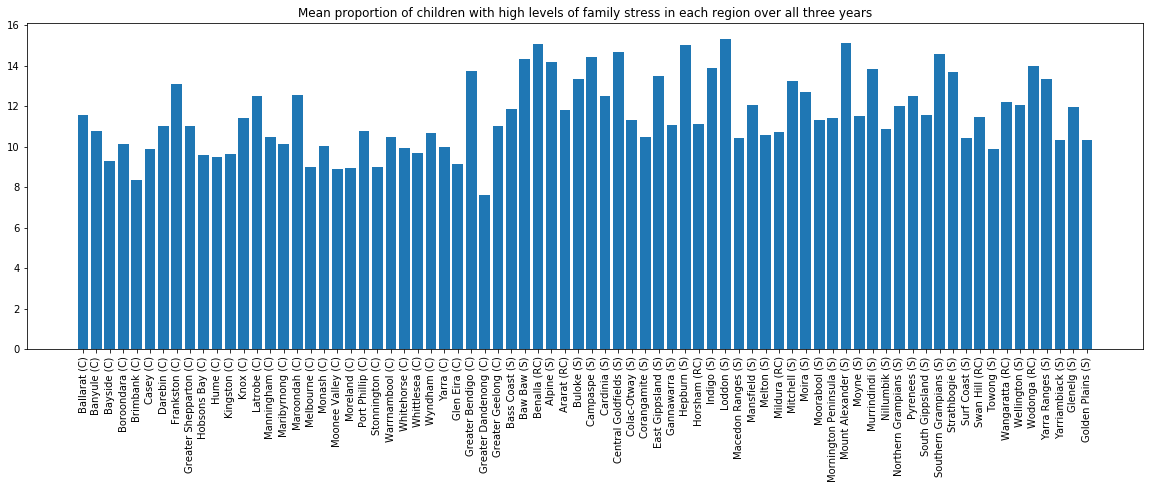

Text(0.5,1,'Pearson Correlation of proportion means from year to year')

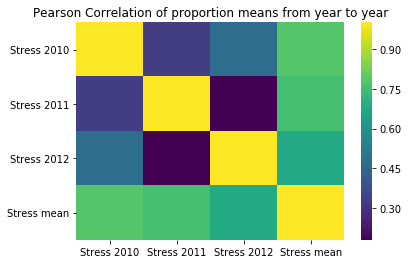

In [9]:
# Do the same as above

cols = []
for col in stress.columns:
    if "indicator" in col and (("2010" in col) or ("2011" in col) or ("2012" in col)):
        cols.append(col)
cols.sort()
        
columns = ['Stress 2010', 'Stress 2011', 'Stress 2012']
stress = stress.loc[:,cols]
stress.columns = columns
stress = stress.dropna()

city = []
rural = []
for row in stress.index:
    if "(C)" in row:
        city.append(row)
    else:
        rural.append(row)

cities = stress.loc[city,:]
rurals = stress.loc[rural,:]
cities.loc['Stress mean'] = cities.mean()
rurals.loc['Stress mean'] = rurals.mean()

stress = stress.loc[city,:].append(stress.loc[rural,:])

stress['Stress mean'] = stress[stress.columns].mean(axis=1)
stress = stress.dropna()

plt.hist(stress['Stress mean'], bins = 4)
plt.title('Proportion of mean proportions of children \nwith high levels of family stress in each region')
plt.show()

plt.xticks(range(7),list(columns),rotation = 45)
plt.title('Mean proportion of children with high\n levels of family stress in each year')
plt.plot(cities.loc['Stress mean',:], color = 'b', label = 'Cities')

plt.xticks(range(7),list(columns),rotation = 45)
plt.plot(rurals.loc['Stress mean',:], color = 'r', label = 'Rural')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize = (20, 6))
plt.bar(np.arange(len(stress['Stress mean'])),stress['Stress mean'])
plt.title('Mean proportion of children with high levels of family stress in each region over all three years')
plt.xticks(np.arange(len(stress.index)),stress.index, rotation=90)
plt.show()

cor = sns.heatmap(stress.corr(), cmap = 'viridis', xticklabels = list(stress), yticklabels = list(stress))
plt.title('Pearson Correlation of proportion means from year to year')


# <center> Data Analysis </center>

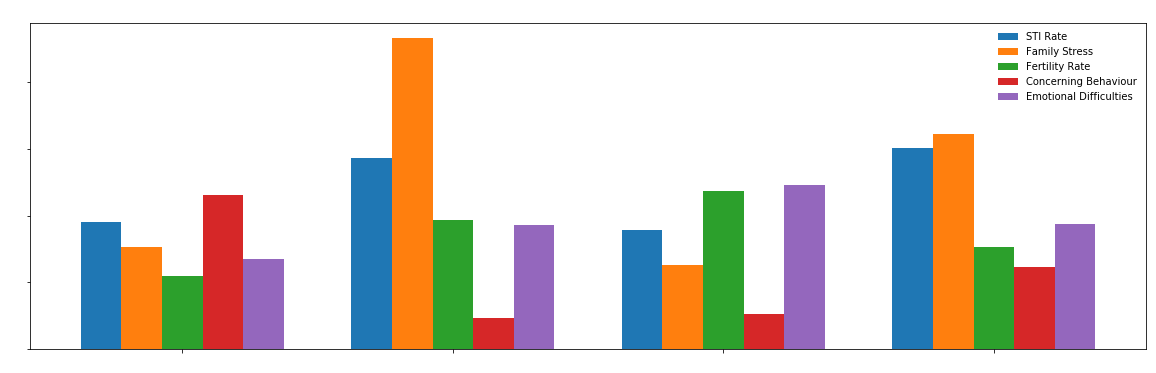

In [10]:
# Find all the regions that all the datasets share (after removing those with null values)

shared = fertility.index.intersection(sti.index)
shared = shared.intersection(stress.index)
shared = shared.intersection(emotional.index)
shared = shared.intersection(concerning.index)

fertility_df = fertility.loc[shared]
sti_df = sti.loc[shared]
stress_df = stress.loc[shared]
concerning_df = concerning.loc[shared]
emotional_df = emotional.loc[shared]


# Make a column vector with 0s or 1s based on whether the region is a city or a rural area

labels = []
for row in shared:
    if "(C)" in row:
        labels.append(1)
    else:
        labels.append(0)

labels = pd.DataFrame(labels)
labels.index = shared
labels.columns = ['labels']


# Create empty lists to hold all the nmi values of the dataset and the region type

nmi_sti = []
nmi_stress = []
nmi_fertility = []
nmi_concerning = []
nmi_emotional = []

for i in range(4):
    df = pd.DataFrame()
    
   
    # Discretise the numeric values into categorical values (bins)
    
    df['STI'] = pd.cut(sti_df.iloc[:,i],4)
    df['Stress'] = pd.cut(stress_df.iloc[:,i],4)
    df['Fertility'] = pd.cut(fertility_df.iloc[:,i],4)
    df['Concerning'] = pd.cut(concerning_df.iloc[:,i],4)
    df['Emotional'] = pd.cut(emotional_df.iloc[:,i],4)
    
    nmi_sti.append(mutual_info(df.iloc[:,0],labels['labels']))
    nmi_stress.append(mutual_info(df.iloc[:,1],labels['labels']))
    nmi_fertility.append(mutual_info(df.iloc[:,2],labels['labels']))
    nmi_concerning.append(mutual_info(df.iloc[:,3],labels['labels']))
    nmi_emotional.append(mutual_info(df.iloc[:,4],labels['labels']))

    
# Plot a bar graph to hold all the nmi values

plt.figure(figsize = (20, 6))
plt.bar(np.arange(len(nmi_sti))-0.3, nmi_sti, width = 0.15, label = 'STI Rate')
plt.bar(np.arange(len(nmi_stress))-0.15, nmi_stress, width = 0.15, label = 'Family Stress')
plt.bar(np.arange(len(nmi_fertility)), nmi_fertility, width = 0.15, label = 'Fertility Rate')
plt.bar(np.arange(len(nmi_concerning))+0.15, nmi_concerning, width = 0.15, label = 'Concerning Behaviour')
plt.bar(np.arange(len(nmi_emotional))+0.3, nmi_emotional, width = 0.15, label = 'Emotional Difficulties')
plt.xticks(np.arange(len(nmi_fertility)), ['2010','2011','2012', 'Means'], color = 'w')
plt.yticks(color='w')
plt.title('Normalised mutual information between all attributes and the region type', color = 'w')
plt.legend(frameon=False)
plt.savefig('NMI.pdf', transparent = True)
plt.show()


As we can see, while most of the attributes do not have a significant nmi (<20) when you look at them individually for each year, especially the proportion of children with concerning behaviour, the family stress level gave a very significant nmi in 2011, which would signify a significant correlation between the attribute and the type of regions. Also, the nmi values for the proportion of children with emotional difficulties and fertility rates are gradually increasing. However since we only have 3 years to work with due to a lack of data in other years, it is hard to gauge if this is merely a oincidence or if there is a significant relationship between the nmi values of the attributes and the region type as the years go on.

However, in general, the STI rates and family stress levels have a rather significant nmi value and can therefore be said to have a moderate correlation with the region types.

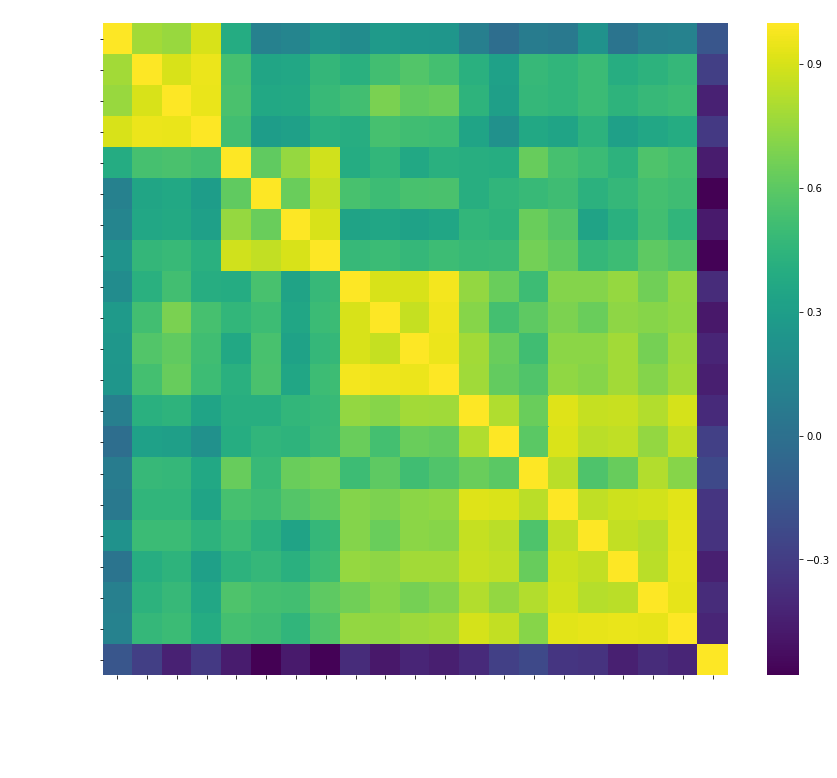

In [11]:
# Create a dataframe to hold all the columns from all the datasets

the_one = sti.iloc[:,0]
the_one = pd.DataFrame(the_one)

for i in range(1,4):
    the_one = the_one.join(sti.iloc[:,i])

for i in range(4):
    the_one = the_one.join(stress.iloc[:,i])
    
for i in range(4):
    the_one = the_one.join(fertility.iloc[:,i])
    
for i in range(4):
    the_one = the_one.join(concerning.iloc[:,i])

for i in range(4):
    the_one = the_one.join(emotional.iloc[:,i])
    
    
# Drop all rows with null values 

the_one = the_one.dropna()
the_one['labels'] = labels


# Correlation between each dataset (attribute) with each other and the region type

plt.figure(figsize=(14, 12))
cor = sns.heatmap(the_one.corr(), cmap = 'viridis', xticklabels = list(the_one), yticklabels = list(the_one))
plt.title('Pearson Correlation of all the attributes', color = 'w')
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.savefig('Pearson.pdf', transparent = True)


From the above heatmap, we can see that while most of the attributes have positive correlations with one another, especially between attributes of the same types, which is essentially just extensions of the individual correlations above(when wrangling each individual attribute), the label has a moderately negative correlation with each of the attributes for all the years, which ties together with the nmi values previously, and therefore we can conclude from this that an increase in the attributes would likely show a lower label (i.e. rural area).

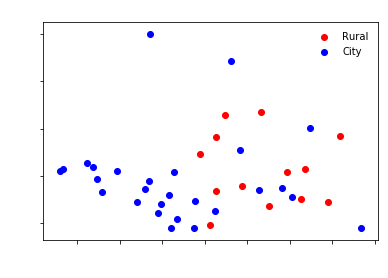

In [12]:
# Create a dataframe to just hold all the means of each of the attributes

means = sti.loc[:,'STI mean']
means = pd.DataFrame(means)
means = means.join(fertility.loc[:,'Fertility mean'])
means = means.join(stress.loc[:,'Stress mean'])
means = means.join(concerning.loc[:,'Concerning mean'])
means = means.join(emotional.loc[:,'Emotional mean'])

means= means.dropna()


# Use the StandardScaler() function to normalise the means of each of the attributes

scaler = StandardScaler().fit(means)
means_scaled = scaler.transform(means)


# Reduce number of dimensions for means matrix to two dimensions by using PCA

sklearn_pca = PCA(n_components = 2)   
means_reduced = sklearn_pca.fit_transform(means_scaled)


# Turn the matrix into a dataframe and get the index from the means matrix and then join up the labels vector

means_reduced = pd.DataFrame(means_reduced)
means_reduced.index = means.index
means_reduced = means_reduced.join(labels)


# Plot the scatter plot for the rural areas in red first and then plot the scatter plot for the cities in blue over it on the same graph

plt.scatter(means_reduced[means_reduced['labels'] == 0].loc[:, 0], means_reduced[means_reduced['labels'] == 0].loc[:, 1], label = 'Rural', color = 'red')
plt.scatter(means_reduced[means_reduced['labels'] == 1].loc[:, 0], means_reduced[means_reduced['labels'] == 1].loc[:, 1], label = 'City', color = 'blue')
plt.xlabel('First principal component', color = 'w')
plt.xticks(color = 'w')
plt.ylabel('Second principal component', color = 'w')
plt.yticks(color = 'w')
plt.title('Dimension reduction with feature scaling', color = 'w')
plt.legend(frameon = False)
plt.savefig('PCA.pdf', transparent = True)
plt.show()


Using the means of each of the attributes over all three years in each region, we reduce the dimension using PCA so we can visualise it in 2-dimensions, and from this, we can see that rural areas tend to cluster together, which means that they tend to have similar values in their attributes, while the cities would cluster together as well, though considerably more spread out than the rural areas.

In [13]:
# Split 80% of the instances to be training and the rest to be testing to try to prove the relationship

X_train, X_test, y_train, y_test = train_test_split(means,labels, train_size=0.80, random_state=42)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Region type prediction using DT after pruning
Train accuracy: 87.50 %
Test accuracy: 37.50 % 



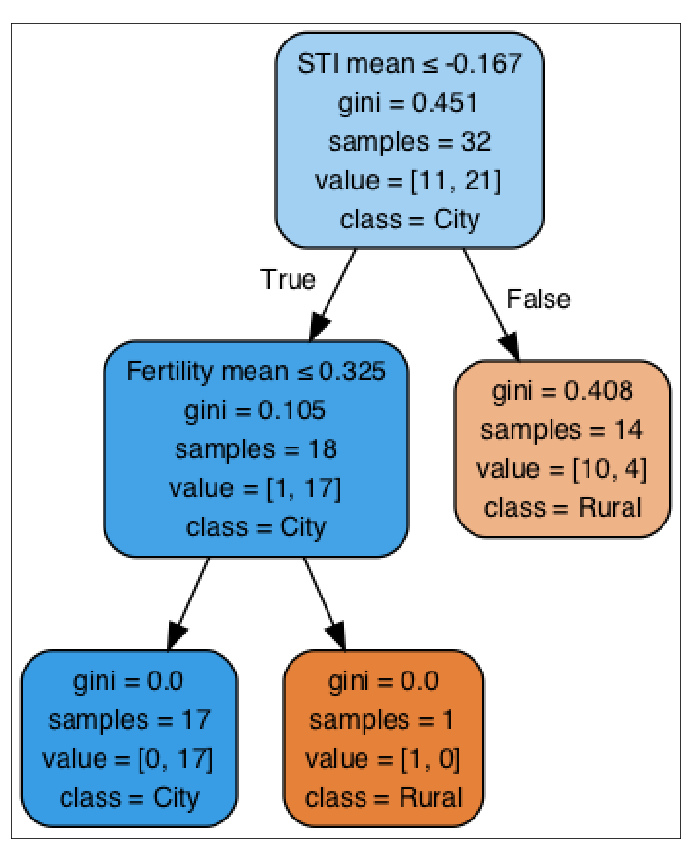

In [14]:
# Scale X_train and X_test using the values found in X_train

scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


# Use the Decision Tree Classifier to try to predict the region types

dtp = DecisionTreeClassifier(min_impurity_decrease=0.04)
dtp = dtp.fit(X_train, y_train)

y_train_pred=dtp.predict(X_train)
y_test_pred=dtp.predict(X_test)

print('Region type prediction using DT after pruning')
print('Train accuracy: {:.2f} %'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.2f} % \n'.format(100 * accuracy_score(y_test, y_test_pred)))


plt.figure(figsize=(15, 15))


# Create a .dot file to hold the decision tree with pruning

dot = export_graphviz(dtp, out_file = "prune.dot", feature_names = means.columns, class_names = {0: "Rural", 1: "City"}, filled = True, rounded = True, special_characters = True)
! dot -Tpng prune.dot -o prune.png 
im = plt.imread('prune.png')
plt.imshow(im)
plt.title('Decision Tree With Pruning', color = 'w')
plt.xticks([])
plt.yticks([])
plt.savefig('Tree.pdf', transparent = True)

From this decision tree, we can see that the main defining conditions that would set apart which branch the instance would use is STI rates and fertility rates. This may not be what we expect as we would have expected the STI rates and family stress to be the best conditions, but this may be to there not being enough instances to create a robust-enough decision tree.

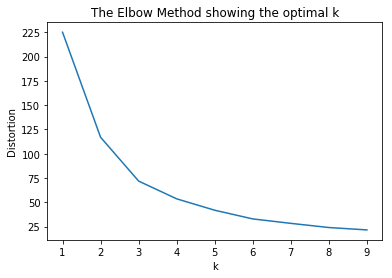

In [15]:
# Elbow Method to find optimal k value


# Create empty list to hold the distortion values

distortions = []


# Test up to 10 neighbours

for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(means)
    kmeanModel.fit(means)
    
    
    # Append the sum of the euclidean distances between the cluster centers
    
    distortions.append(sum(np.min(cdist(means, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / means.shape[0])

    
# Plot the line graph of the Elbow Method

plt.plot(range(1, 10), distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [16]:
# Create an instance from the KNeighborsClassifier and set the number of neighbors to 2

knn = KNeighborsClassifier(n_neighbors=2)


# Train/fit the model using X_train and y_train

knn.fit(X_train, y_train)


# Predict values

y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)


# Print accuracy of prediction against the real classification labels

print('Region type prediction using K-NN')
print('Train accuracy: {:.2f} %'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.2f} %'.format(100 * accuracy_score(y_test, y_test_pred)))


Region type prediction using K-NN
Train accuracy: 87.50 %
Test accuracy: 50.00 %


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Using a clustering method and the elbow method to ind the number of clusters, we can see that using 2 clusters yields the most accurate results, which goes hand-in-hand with the number of clusters we would want to have (2: 1 for cities and 1 for rural areas). Though the low test accuracy may be due to the not having enough instances to accurately group into clusters.

# <center> Conclusion </center>

We can conclude that there seems to be a slight correlation between the attributes and the region type, and this aids in answering our question of whether being in the city affect a teenager's emotional and sexual health.

However, as we know, correlation does not equate to causation. Therefore, this only serves as a reason to further investigate into the significance of this correlation, and if there truly exists a cause and effect relationship, we must act upon this knowledge and do something about this, which is why we need to have more investigations and datasets on this.